<a href="https://colab.research.google.com/github/AlexHLinS/applyed_dl_hse_2022/blob/master/HSE_sound_2_home.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Расшифровка CTC выходов

In [1]:
!pip install torch gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!gdown 1GvxcW533qqn8QGAE9lVvcMqqfYYssU5d -O lj_batch.pickle
!gdown 1Fju8NoHrukceVvIIaPDw-qGUxyiJCd7- -O mystery_records.pickle

Downloading...
From: https://drive.google.com/uc?id=1GvxcW533qqn8QGAE9lVvcMqqfYYssU5d
To: /content/lj_batch.pickle
100% 349k/349k [00:00<00:00, 89.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Fju8NoHrukceVvIIaPDw-qGUxyiJCd7-
To: /content/mystery_records.pickle
100% 147k/147k [00:00<00:00, 73.7MB/s]


In [3]:
import pickle
import torch


# Load precomputed CTC output
with open('mystery_records.pickle', 'rb') as f:
    batch = pickle.load(f)

# log probabilities of softmax layers [batch_size, T, vocab_size]
log_probs = batch["log_probs"]

# Dictionary with index to character mapping
ind2char = batch["ind2char"]

# Index of special EMPTY token
EMPTY_TOK = '^'
EMPTY_IND = 0

Задача: реализовать простую расшифровку CTC выхода


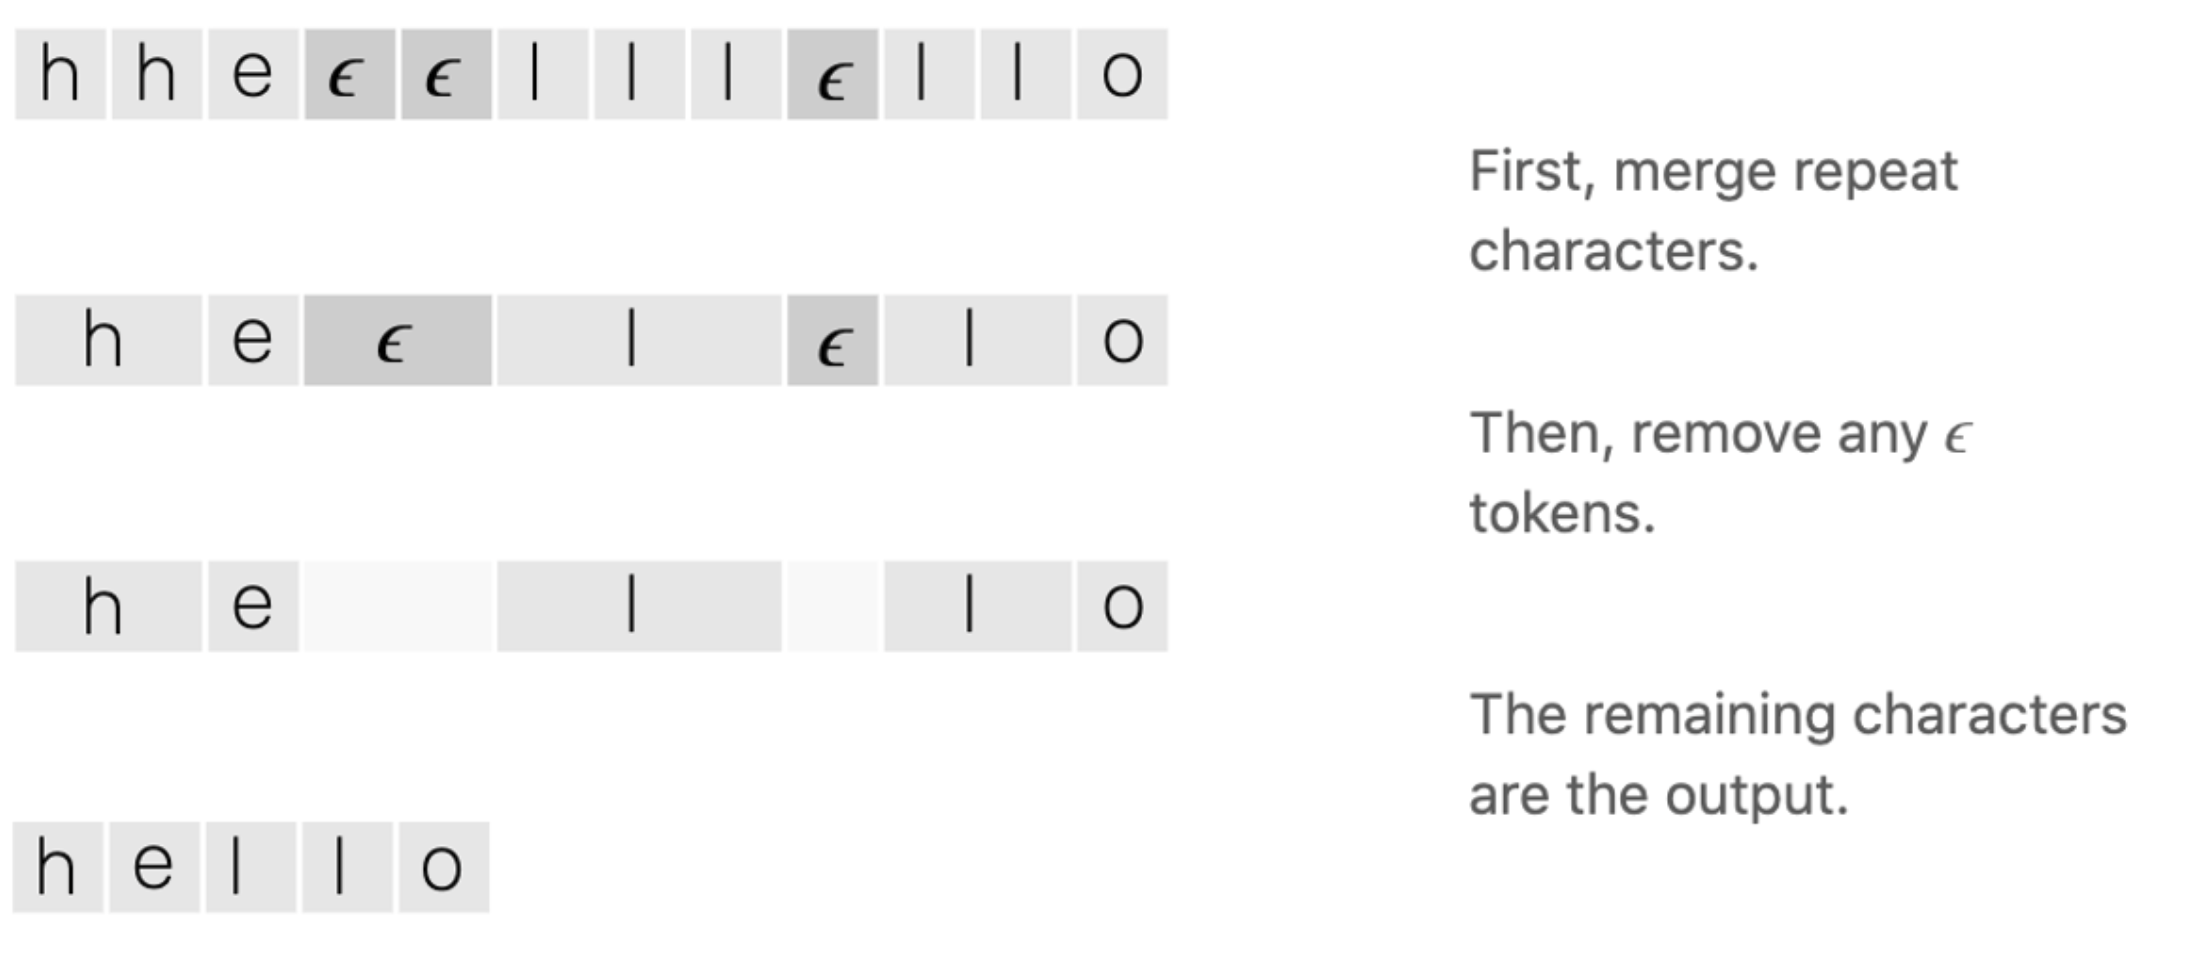

In [ ]:
def ctc_decode(inds, ind2char):
    # your code here
    raise NotImplementedError

for i, rec in enumerate(log_probs):
    text = ctc_decode(rec.argmax(-1).numpy(), ind2char)
    print(f"{i}) {text}")

Рассчитываем WER и CER метрики

Задача: Написать самим подсчет метрик

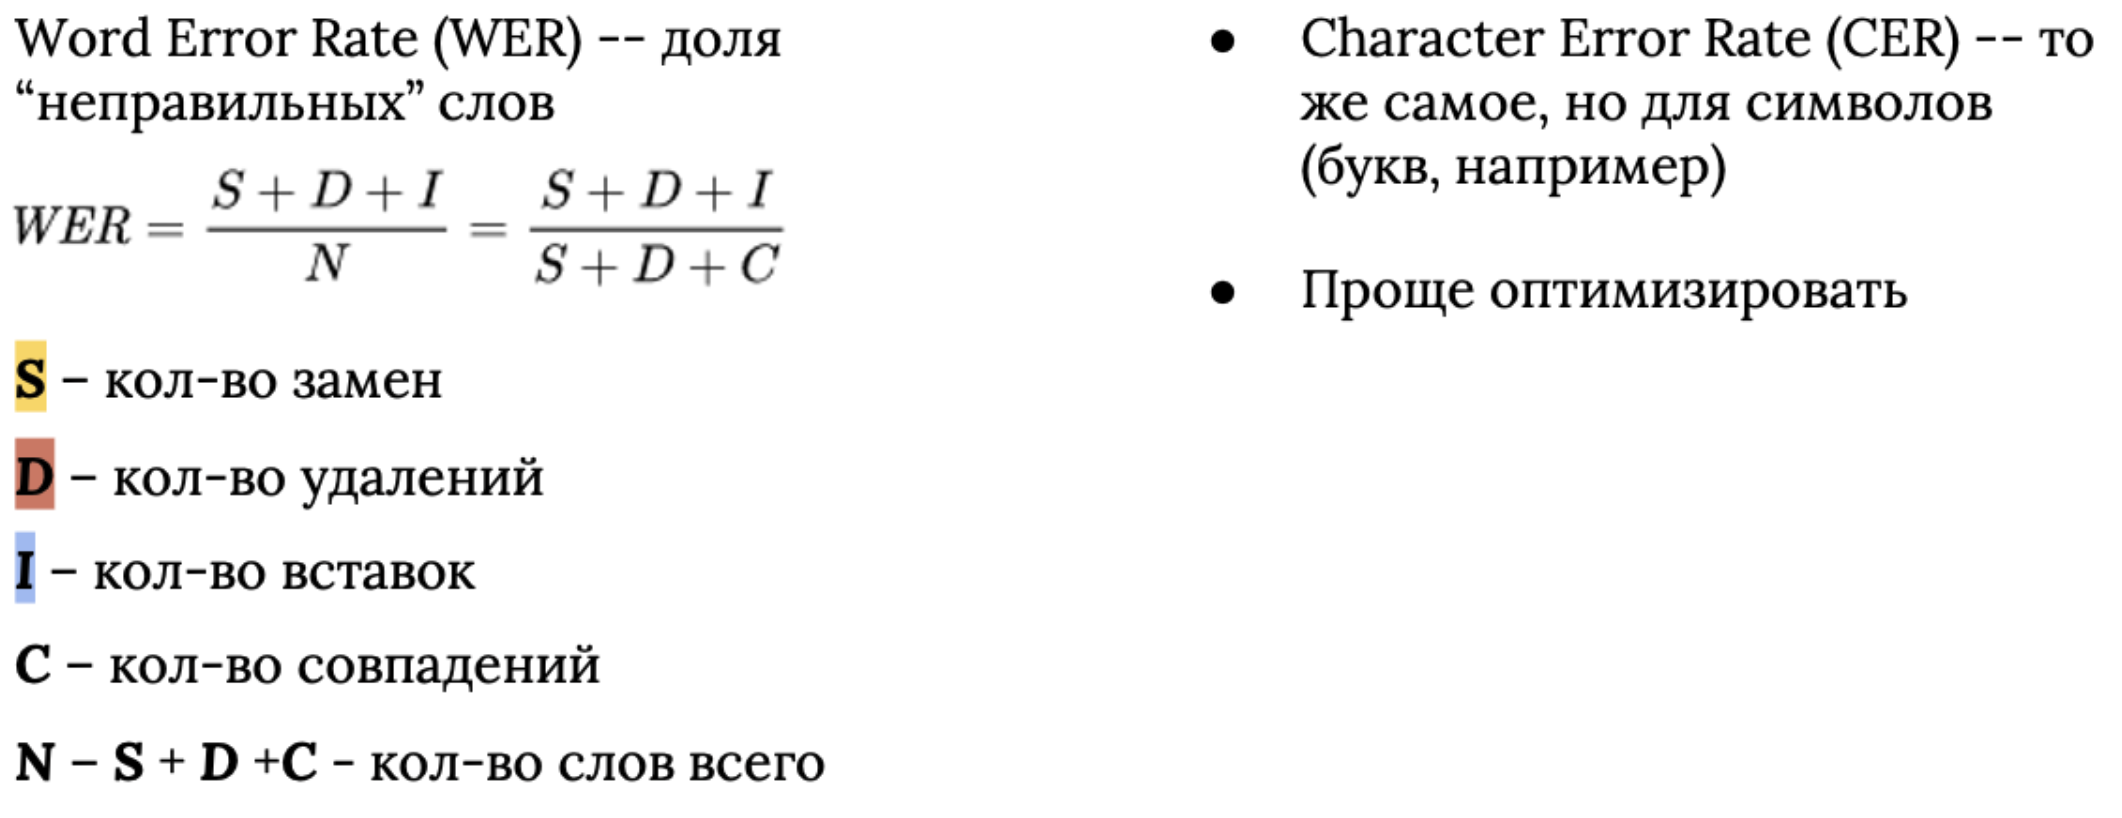

In [ ]:
# library for fast quick calculation of edit distance
import editdistance

def calc_wer(target_text: str, pred_text: str):
    # your code here
    raise NotImplementedError
    

def calc_cer(target_text: str, pred_text: str):
    # your code here
    raise NotImplementedError

editdistance.distance может использоваться для подсчета разницы между массивами

In [ ]:
import numpy as np

for target, pred, expected_wer, expected_cer in [
    ("if you can not measure it you can not improve it", 
     "if you can nt measure t yo can not i", 
     0.454, 0.25),
    ("if you cant describe what you are doing as a process you dont know what youre doing", 
     "if you cant describe what you are doing as a process you dont know what youre doing", 
     0.0, 0.0),
    ("one measurement is worth a thousand expert opinions", 
     "one  is worth thousand opinions", 
     0.375, 0.392)
]:
    wer = calc_wer(target, pred)
    cer = calc_cer(target, pred)
    assert np.isclose(wer, expected_wer, atol=1e-3), f"true: {target}, pred: {pred}, expected wer {expected_wer} != your wer {wer}"
    assert np.isclose(cer, expected_cer, atol=1e-3), f"true: {target}, pred: {pred}, expected cer {expected_cer} != your cer {cer}"

Задача: Придумать такие пары "исходный текст -> предсказанный" чтобя для них было 
1. WER > 1.0 
2. CER > WER

In [ ]:
# 1) WER > 1.0
# your code here
target, prediction = "<...>" , "<...>"
assert calc_wer(target, prediction) > 1.0

# 2) CER > WER
# your code here
target, prediction = "<...>", "<...>"
assert calc_wer(target, prediction) < calc_cer(target, prediction) 

# Beam search

Задача: реализовать алгоритм beam search

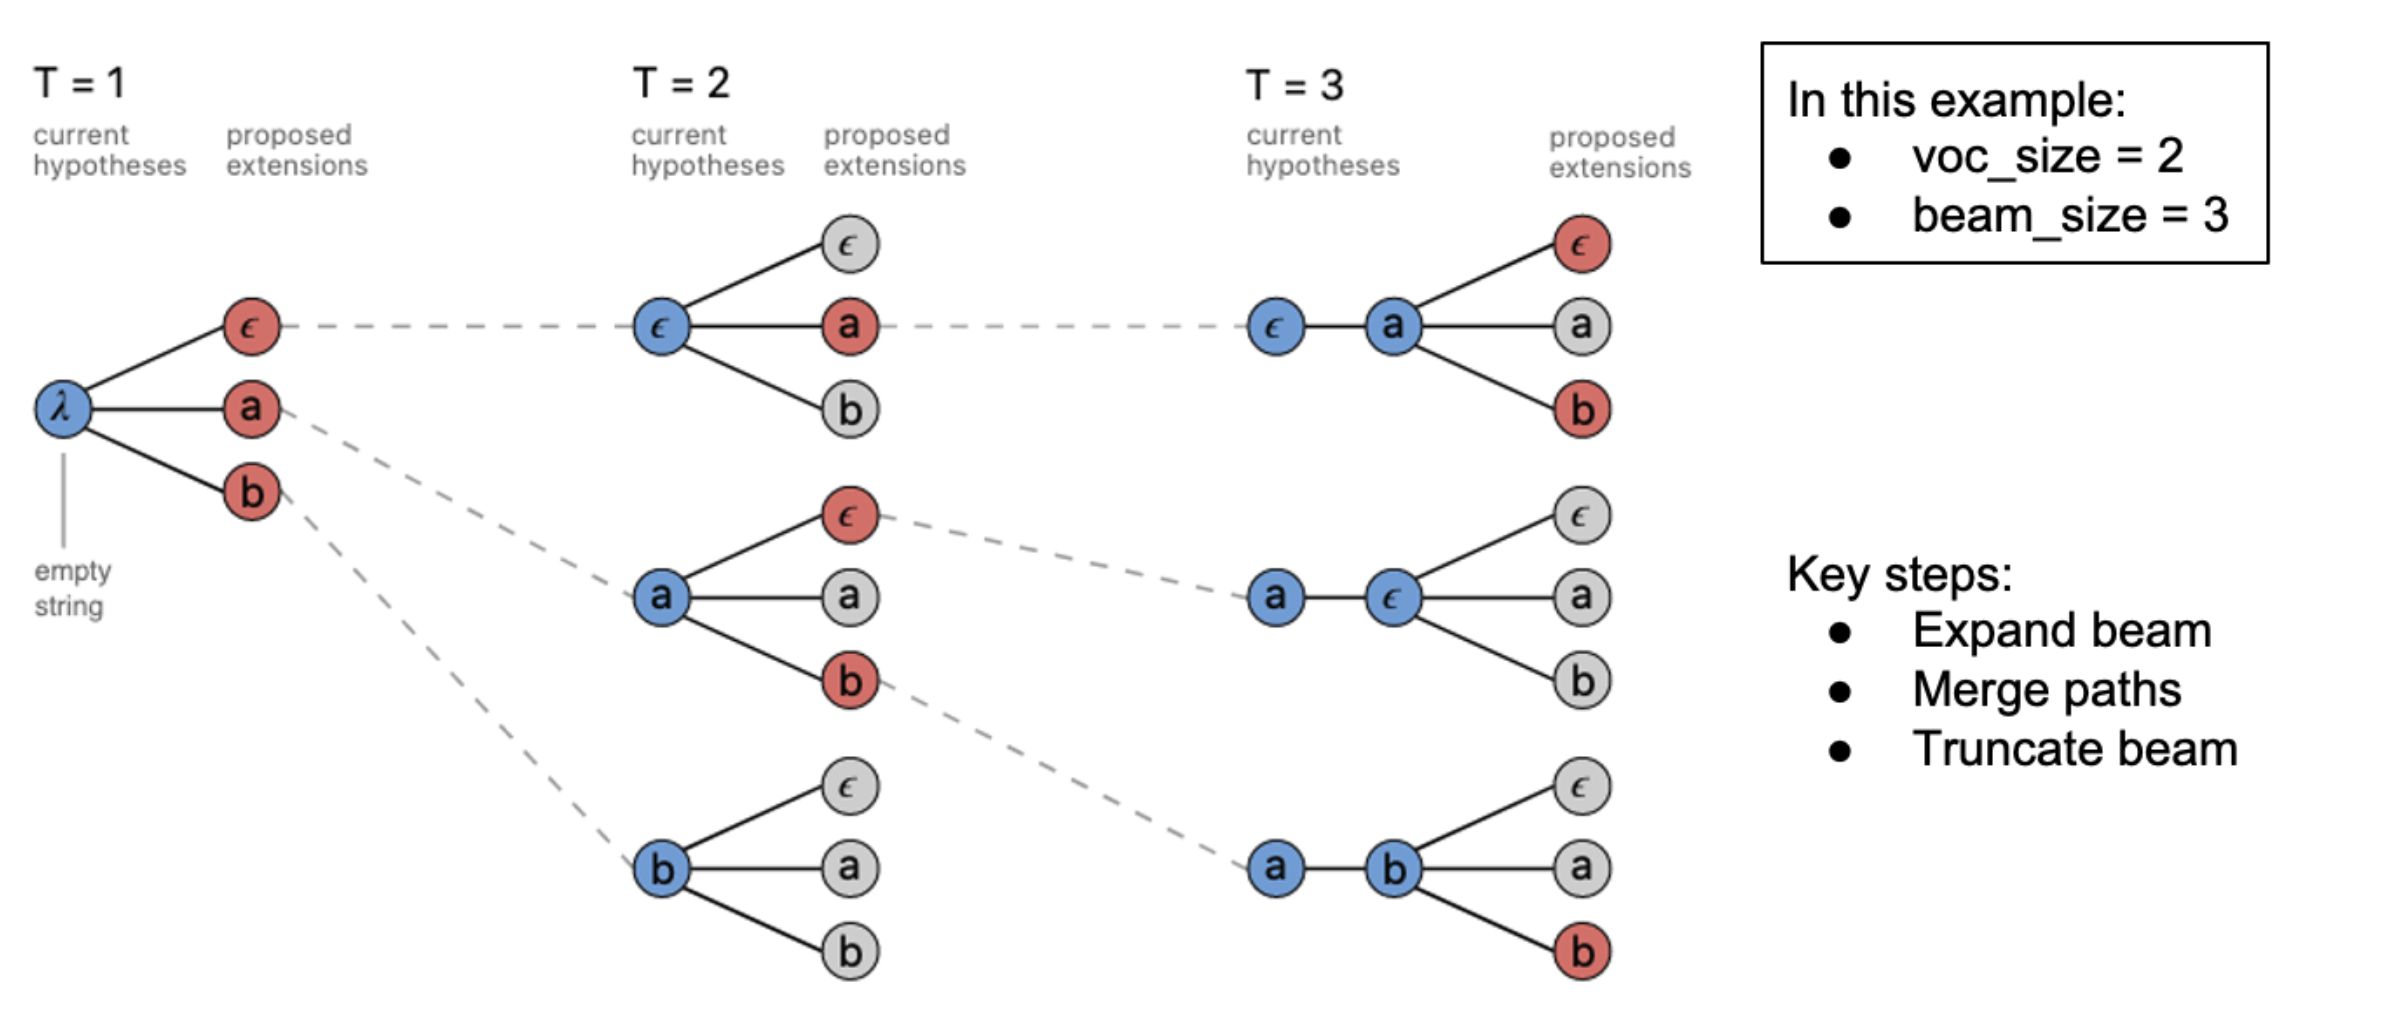

In [ ]:
# Load precomputed CTC output
with open('lj_batch.pickle', 'rb') as f:
    batch = pickle.load(f)

# log probabilities of softmax layers [batch_size, T, vocab_size]
log_probs = batch["log_probs"]

# Dictionary with index to character mapping
ind2char = batch["ind2char"]

true_texts = batch["text"]

In [ ]:
from collections import defaultdict
from tqdm import tqdm

def ctc_beam_search(probs, beam_size, ind2char):
    # your code here
    raise NotImplementedError

bs_results = []
for log_probs_line in log_probs:
    bs_results.append(ctc_beam_search(log_probs_line.exp().numpy(), 100, ind2char))

In [ ]:
for i in range(len(true_texts)):
    beam_search_hypos = bs_results[i][:3]
    true_text = true_texts[i]
    argmax_text = ctc_decode(log_probs[i].numpy().argmax(-1), ind2char)
    print("True: ", true_text)
    print(f"Argmax: {argmax_text} --- (CER: {calc_cer(true_text, argmax_text):.3f})")
    for ind, (hypo, score) in enumerate(beam_search_hypos):
        print(f"{ind+1}) '{hypo}' --- (CER: {calc_cer(true_text, hypo):.3f})")
    print('-' * 100)